**Predicting house prices: a scalar regression example**

#Load the dataset

In [1]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = (
    boston_housing.load_data())

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [3]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [4]:
print(min(train_data[0]), max(train_data[0]))
print(min(train_data[10]), max(train_data[10]))

0.0 396.9
0.0 666.0


##Baseline

In [5]:
import numpy as np

print("mean: ", np.mean(test_targets))
print("mae: ", np.mean(abs(test_targets - np.mean(test_targets))))

mean:  23.07843137254902
mae:  6.5990003844675105


In [6]:
print("Training mean: ", np.mean(train_targets))
print("Test mean: ", np.mean(test_targets))

Training mean:  22.395049504950492
Test mean:  23.07843137254902


#Prepare the data

**Normalizing the input data**

In [8]:
# Prepare inputs
# TODO: Apply the standardization method for feature scaling for the input features
# for both training and test datasets


# TODO
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

Note: the quantities used for normalizing the test data are computed using the
training data. You should **never** use any quantity computed on the test data in your workflow, even for something as simple as data normalization.

#Build the model

**Define and compile the model**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():

  # TODO: Build a neural network model
  model = keras.Sequential(
      [
          # TODO
          layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)),
          layers.Dense(64, activation="relu"),
          layers.Dense(1)
      ]
  )

  # TODO: Configure the model
  model.compile(
      # TODO
      optimizer="rmsprop",
      loss="mse",
      metrics=["mae"]
  )

  return model

#Validate the model

Using K-fold validation

In [14]:
# 500 epochs

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500

all_mae_histories = []

for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
      axis = 0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1) * num_val_samples:]],
      axis = 0
  )

  model = build_model()

  # TODO
  history = model.fit(
      #TODO
      partial_train_data,
      partial_train_targets,
      validation_data=(val_data, val_targets),
      epochs=num_epochs,
      batch_size=16,
      verbose=0
      )

  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)


Processing fold #0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Processing fold #1
Processing fold #2
Processing fold #3


In [15]:
# Building the history of successive mean K-fold validation scores

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

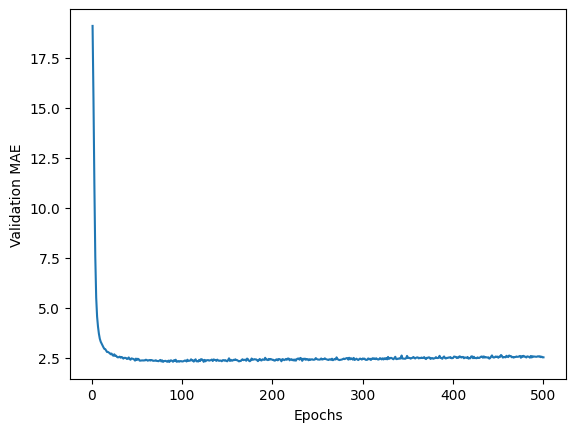

In [16]:
# Plotting validation scores

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

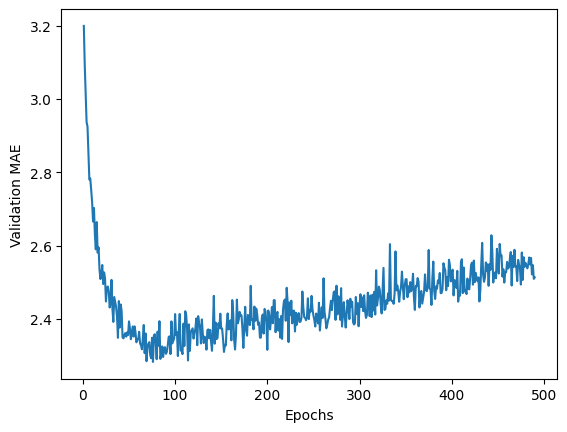

In [17]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Refine the model**

In [18]:
model = build_model()

best_epoch = np.argmin(average_mae_history) + 1
print("Best epoch: ", best_epoch)

# TODO: train the final model using the best epoch
model.fit(
    # TODO
    train_data,
    train_targets,
    epochs=best_epoch,
    batch_size=16,
    verbose=0

)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best epoch:  86


#Predict new data

In [19]:
preditions = model.predict(test_data)
print("predicted: ", preditions[0])
print("target: ", test_targets[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
predicted:  [8.932111]
target:  7.2


In [20]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 13.2851 - mae: 2.5042


2.69413685798645